# Rocks analysis demo. 

In [21]:
import sys

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np

# Jupyter Lab imports.
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, fixed


# Path to local imports.
sys.path.append("/home/drew/He6CRES/rocks_analysis_pipeline/")
from results import ExperimentResults
import postgres_db as db

## Step 0: Query the postgres database to see what run_ids to analyze. 

In [2]:
query_run_log = '''
                    SELECT run_id, run_notes, set_field, created_at, EXTRACT(MONTH from created_at::date) as month
                    FROM he6cres_runs.run_log
                    WHERE num_spec_acq = 100 AND
                    EXTRACT(MONTH from created_at::date) = 8 
                    ORDER BY run_id DESC 
                    LIMIT 57
                  '''

run_log = db.he6cres_db_query(query_run_log)

first_rid_per_field = run_log.groupby(["set_field"]).last()
display(first_rid_per_field)

he6_run_list = first_rid_per_field.run_id.to_list()

print(" ".join(str(x) for x in he6_run_list))

Successfully connected to he6cres_db
Query executed.
Connection to he6cres_db is closed


,run_id,run_notes,created_at,month
set_field,,,,
-3.25,373,"-3.25T, 1/5.",2022-08-18 03:36:35.927806,8.0
-3.00,380,-3T - 1/5,2022-08-18 04:58:33.154671,8.0
-2.75,385,-2.75T - 1/5,2022-08-18 06:18:07.945578,8.0
-2.50,393,-2.50T - 1/5,2022-08-18 07:48:01.891288,8.0
-2.25,399,-2.25T - 1/5,2022-08-18 09:10:07.173661,8.0
-2.00,405,-2.00T - 1/5,2022-08-18 10:19:22.446809,8.0
-1.75,411,-1.75T - 1/5,2022-08-18 11:32:37.587929,8.0
-1.50,418,-1.5T - 1/5,2022-08-18 13:29:25.726547,8.0
-1.25,424,-1.25T - 1/5,2022-08-18 15:15:06.053725,8.0


373 380 385 393 399 405 411 418 424 430 436


## Step 1: Analyze the run_ids. 

* Follow the instructions in the [readme](https://github.com/Helium6CRES/rocks_analysis_pipeline).

## Step 2: Visualize the results and/or build a spectrum. 

In [2]:
local_dir = "/home/drew/He6CRES/cres_analysis_pipeline/random/rocks_test/saved_experiments"
experiment_name = "rocks_demo"
analysis_id = 4
include_root_files=True
rebuild_experiment_dir=False
rocks_username="drewbyron"
rocks_IP="172.25.100.1"

In [3]:
exp_results_demo = ExperimentResults(local_dir = local_dir, 
                                     experiment_name = experiment_name, 
                                     analysis_id = analysis_id, 
                                     include_root_files = include_root_files,
                                     rebuild_experiment_dir=rebuild_experiment_dir,
                                     rocks_username=rocks_username, 
                                     rocks_IP=rocks_IP
                                    )

Keeping existing experiment directory.

All 18 root files are already present here: /home/drew/He6CRES/cres_analysis_pipeline/random/rocks_test/saved_experiments/rocks_demo_aid_4/root_files


In [5]:
exp_results_demo.tracks.head()

,UniqueID,Bits,Component,AcquisitionID,TrackID,EventID,EventSequenceID,IsCut,StartTimeInRunC,StartTimeInAcq,...,field,monitor_rate,FreqIntc,TimeIntc,TimeIntc_mean,TimeIntc_std,TimeLength_mean,TimeLength_std,Slope_mean,Slope_std
0,0.0,50331648.0,0.0,0.0,24.0,1.0,-1.0,0.0,0.024989,0.024989,...,10,10,-3.974455e+09,0.022088,0.022137,0.000188,0.000119,0.000076,1.823750e+11,1.033839e+10
1,0.0,50331648.0,0.0,0.0,26.0,1.0,-1.0,0.0,0.025194,0.025194,...,10,10,-3.919535e+09,0.022050,0.022137,0.000188,0.000119,0.000076,1.823750e+11,1.033839e+10
2,0.0,50331648.0,0.0,0.0,27.0,1.0,-1.0,0.0,0.025521,0.025521,...,10,10,-4.001232e+09,0.022111,0.022137,0.000188,0.000119,0.000076,1.823750e+11,1.033839e+10
3,0.0,50331648.0,0.0,0.0,29.0,1.0,-1.0,0.0,0.025569,0.025569,...,10,10,-3.986842e+09,0.022100,0.022137,0.000188,0.000119,0.000076,1.823750e+11,1.033839e+10
4,0.0,50331648.0,0.0,0.0,30.0,1.0,-1.0,0.0,0.025658,0.025658,...,10,10,-3.923869e+09,0.022052,0.022137,0.000188,0.000119,0.000076,1.823750e+11,1.033839e+10


In [6]:
exp_results_demo.events.head()

,run_id,file_id,EventID,EventStartTime,EventEndTime,EventStartFreq,EventEndFreq,EventTimeLength,EventFreqLength,EventTrackCoverage,EventMeanSNR,EventSlope,EventNBins,EventTrackTot,EventFreqIntc,EventTimeIntc,field,monitor_rate
0,373,0,1,0.024989,0.027051,5.220255e+08,8.900276e+08,0.002062,3.680021e+08,0.695364,10.758913,1.784985e+11,55.0,12,-3.938476e+09,0.022064,10,10
1,373,0,2,0.048370,0.054460,1.024997e+08,1.186159e+09,0.006089,1.083660e+09,1.033632,12.568884,1.779588e+11,381.0,77,-8.505428e+09,0.047794,10,10
2,373,0,3,0.120849,0.123081,6.125950e+08,1.009885e+09,0.002232,3.972896e+08,1.079511,10.880306,1.779716e+11,60.0,12,-2.089511e+10,0.117407,10,10
3,373,0,4,0.158512,0.164458,1.259588e+08,1.184515e+09,0.005946,1.058556e+09,0.991963,12.230449,1.780275e+11,372.0,76,-2.809349e+10,0.157804,10,10
4,373,0,5,0.171687,0.177565,1.446747e+08,1.197968e+09,0.005878,1.053294e+09,0.976771,12.351321,1.791998e+11,344.0,71,-3.062165e+10,0.170880,10,10


In [7]:
%matplotlib widget

plt.rcParams['figure.dpi']= 100

@interact
def analysis_viz(
    run_id = widgets.Select(options = exp_results_demo.run_ids, description='run_id: '),
    file_id = widgets.Select(options = exp_results_demo.file_ids, description='file_id: '),
    events = widgets.Checkbox(True, description='events'),
    tracks = widgets.Checkbox(False, description='tracks'),
    sparse = widgets.Checkbox(False, description='sparse_spec'),
    EventID = widgets.IntSlider(value=1,min=1,max=20,step=1),
    mrk_sz = widgets.FloatSlider(value=.08,min=0,max=1.0,step=1e-2),
    alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=.7,min=0.0,max=1.0,step=1e-2),
):

    config = {"tracks": {"show": tracks,  "alpha": alpha, "EventIDs":[EventID]}, 
              "events": {"show": events, "alpha": alpha}, 
              "sparse_spec": {"show": sparse, "frac_pts": frac_pts,  "alpha": alpha, "mrk_sz": mrk_sz}}
    
    exp_results_demo.visualize(run_id, file_id, config)


interactive(children=(Select(description='run_id: ', options=(373, 380, 393, 399, 405, 411, 418, 424, 430, 436…

In [8]:
%matplotlib widget

exp_tracks = exp_results_demo.tracks
fields = sorted(exp_tracks['field'].unique().tolist())

plt.rcParams['figure.dpi']= 100
@interact
def scatter_plots(
    field = widgets.Select(options = fields,  description='field: '),
    column_1 = widgets.Select(options = exp_tracks.columns,value = 'StartFrequency', description='x_col: '),
    column_2 = widgets.Select(options = exp_tracks.columns,value = 'Slope', description='y_col: '),
    ss_mrk_sz = widgets.FloatSlider(value=.4,min=0,max=1.0,step=1e-2),
    ss_alpha = widgets.FloatSlider(value=1.0,min=0.0,max=1.0,step=1e-2), 
    frac_pts = widgets.FloatSlider(value=0.02,min=0.0,max=1.0,step=1e-2), 
    bins = widgets.IntSlider(value=200,min=50,max=700,step=10),
    fix_field = widgets.Checkbox(
    value=False,
    description='fix field',
    disabled=False,
    indent=False
)
):
    plot_settings = {
        "plt_dim": (12, 6),
        "sparse_spec_mrk_sz": ss_mrk_sz,
        "sparse_spec_alpha": ss_alpha
    }
    if fix_field: 
        condition = (exp_tracks.field == field)
        tracks = exp_tracks[condition]
    else: 
        tracks = exp_tracks
    
    plt.close("all")
    tracks = tracks[(-.5 < tracks["TimeIntc"]) & ( tracks["TimeIntc"] < 3.0)]
    fig0, ax0 = plt.subplots( figsize=(12,4))

    ax0.set_title("Scatter: {} vs {}".format(column_1, column_2))
    ax0.set_xlabel("{}".format(column_1))
    ax0.set_ylabel("{}".format(column_2))

    c =['b','r','g','c','m','y','k','b','g','r','c','m','y','k','b','g','r','c','m','y','k']
    label = "{} tracks".format(
    tracks.shape[0])

    # Scatter Plots
    ax0.plot(tracks[column_1],tracks[column_2], 'o', markersize = ss_mrk_sz, alpha = ss_alpha, color = c[0] )
    
    plt.show()
    
    fig1, ax1 = plt.subplots( figsize=(12,4))
    
    ax1.set_title("Histogram. x_col: {}".format(column_1))
    ax1.set_xlabel("{}".format(column_1))
    
    # Scatter Plots
    ax1.hist(tracks[column_1], bins = bins, color = c[1] )
    
    plt.show()
    
    fig2, ax2 = plt.subplots( figsize=(12,4))
    
    ax2.set_title("Histogram. y_col: {}".format(column_2))
    ax2.set_xlabel("{}".format(column_2))
    
    # Scatter Plots
    ax2.hist(tracks[column_2], bins = bins, color = c[1] )
    
    plt.show()
    

interactive(children=(Select(description='field: ', options=(10,), value=10), Select(description='x_col: ', in…

## 10/3/22: DEV: 

* Figuring out how the nmr and monitor values get retrieved from the database. 
* Goal is that given the file name we get the date and then we grab the rate and nmr value associated with that file. 
* The fact that we may associate one field for the entire set of files at a given field can be ignored for now. We can deal with that when we compare to MC. 

Current strategy: 
    * Break it down by run_id, then grab the entire table between the extreme times, then use this to get the values for  

In [4]:


datetime_str = '09/19/18 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  

<class 'datetime.datetime'>
2018-09-19 13:55:26


## Step 0. Get the file names and pst/utc time stamps for each file. 

In [13]:
root_file_paths = exp_results_demo.tracks.groupby(["run_id", "file_id"]).root_file_path.first().reset_index()

In [14]:
def get_utc_time(root_file_path):
    
    time_str = root_file_path[-28:-9]
    datetime_object = datetime.strptime(time_str, '%Y-%m-%d-%H-%M-%S')

    return datetime_object

In [15]:
root_file_paths["pst_time"] = root_file_paths["root_file_path"].apply(
                    lambda x: get_utc_time(x)
                )
root_file_paths["pst_time"] = root_file_paths["pst_time"].dt.tz_localize('US/Pacific')
root_file_paths["utc_time"] = root_file_paths["pst_time"].dt.tz_convert('UTC')

In [8]:
display(root_file_paths.head(2))

,run_id,file_id,root_file_path,pst_time,utc_time
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00


In [22]:
# Sanity check:
print(root_file_paths.iloc[0].root_file_path)
print(root_file_paths.iloc[0].pst_time)
print(root_file_paths.iloc[0].utc_time)

/data/eliza4/he6_cres/katydid_analysis/root_files/rid_0373/aid_004/Freq_data_2022-08-17-20-29-17_004.root
2022-08-17 20:29:17-07:00
2022-08-18 03:29:17+00:00


## Step 1. Feed this to a function that gets the rate and nmr. 

* 2 functions. 

In [34]:
def get_nearest(df, dt): 
    
    # created_at column is the dt column.
    minidx = (dt - df['created_at']).abs().idxmin()
    
    return df.loc[[minidx]].iloc[0]

In [32]:
def add_rate(root_file_paths):
    
    root_file_paths["rate"] = np.nan
    
    # Step 0. Group by run_id.
    for rid, root_file_paths_gb in root_file_paths.groupby(["run_id"]): 
        
        # Step 1. Find the extreme times present in the given run_id. 
        # The idea is that we want to be careful about the amount of queries we do to get this info. 
        # Here we only do one query per run_id (instead of one per file)

        dt_max = root_file_paths_gb.utc_time.max().floor('min').tz_localize(None)
        dt_min = root_file_paths_gb.utc_time.min().floor('min').tz_localize(None)

        # There is an issue here right now but this will be useful later. 
        query = '''SELECT m.monitor_id, m.created_at, m.rate
                   FROM he6cres_runs.monitor as m 
                   WHERE m.created_at >= '{}'::timestamp
                       AND m.created_at <= '{}'::timestamp + interval '1 minute'
                       
                '''.format(dt_min, dt_max)

        monitor_log = db.he6cres_db_query(query)
        monitor_log["created_at"] = monitor_log["created_at"].dt.tz_localize('UTC')
        
        for fid, file_path in root_file_paths_gb.groupby(["file_id"]):

            if len(file_path) != 1:
                raise UserWarning(f"There should be only one file with run_id = {rid} and file_id = {fid}.")
            
            # Get rate during run. 
            rate = get_nearest(monitor_log, file_path.utc_time.iloc[0]).rate
            
            # Now get the nearest rate for each file_id and fill those in!! Then this gets joined with the whole table. 
            condition = ((root_file_paths["run_id"] == rid) & (root_file_paths["file_id"] == fid))
            root_file_paths["rate"][condition] = rate
    
    if root_file_paths["rate"].isnull().values.any():
        raise UserWarning(f"Some rate data was not collected.")
            
    return root_file_paths


In [35]:
def add_nmr(root_file_paths):
    
    root_file_paths["nmr"] = np.nan
    
    # Step 0. Group by run_id.
    for rid, root_file_paths_gb in root_file_paths.groupby(["run_id"]): 
        
        # Step 1. Find the extreme times present in the given run_id. 
        # The idea is that we want to be careful about the amount of queries we do to get this info. 
        # Here we only do one query per run_id (instead of one per file)
        dt_max = root_file_paths_gb.utc_time.max().floor('min').tz_localize(None)
        dt_min = root_file_paths_gb.utc_time.min().floor('min').tz_localize(None)
        
        # Note that I also need to make sure the nmr probe was locked! 
        query = '''SELECT n.nmr_id, n.created_at, n.field
                   FROM he6cres_runs.nmr as n 
                   WHERE n.created_at >= '{}'::timestamp
                       AND n.created_at <= '{}'::timestamp + interval '1 minute'
                       AND n.locked = TRUE
                '''.format(dt_min, dt_max)

        nmr_log = db.he6cres_db_query(query)
        nmr_log["created_at"] = nmr_log["created_at"].dt.tz_localize('UTC')
        
        for fid, file_path in root_file_paths_gb.groupby(["file_id"]):

            if len(file_path) != 1:
                raise UserWarning(f"There should be only one file with run_id = {rid} and file_id = {fid}.")
            
            # Get rate during run. 
            nmr = get_nearest(nmr_log, file_path.utc_time.iloc[0]).field
            
            # Now get the nearest rate for each file_id and fill those in!! Then this gets joined with the whole table. 
            condition = ((root_file_paths["run_id"] == rid) & (root_file_paths["file_id"] == fid))
            root_file_paths["nmr"][condition] = nmr
    
    if root_file_paths["nmr"].isnull().values.any():
        raise UserWarning(f"Some rate data was not collected.")
            
    return root_file_paths


In [36]:
add_nmr(root_file_paths)

/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,run_id,file_id,root_file_path,pst_time,utc_time,nmr,rate
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00,3.249954,NaN
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00,3.249954,NaN
2,380,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:34-07:00,2022-08-18 04:53:34+00:00,2.999856,NaN
3,380,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:37-07:00,2022-08-18 04:53:37+00:00,2.999856,NaN
4,393,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:20-07:00,2022-08-18 07:41:20+00:00,2.500066,NaN
5,393,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:23-07:00,2022-08-18 07:41:23+00:00,2.500066,NaN
6,399,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:45-07:00,2022-08-18 09:01:45+00:00,2.250090,NaN
7,399,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:48-07:00,2022-08-18 09:01:48+00:00,2.250086,NaN
8,405,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:31-07:00,2022-08-18 10:12:31+00:00,2.000079,NaN
9,405,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:34-07:00,2022-08-18 10:12:34+00:00,2.000079,NaN


In [37]:
add_rate(root_file_paths)

/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,run_id,file_id,root_file_path,pst_time,utc_time,nmr,rate
0,373,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:17-07:00,2022-08-18 03:29:17+00:00,3.249954,58525.00
1,373,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 20:29:19-07:00,2022-08-18 03:29:19+00:00,3.249954,58890.89
2,380,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:34-07:00,2022-08-18 04:53:34+00:00,2.999856,55735.00
3,380,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-17 21:53:37-07:00,2022-08-18 04:53:37+00:00,2.999856,54821.00
4,393,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:20-07:00,2022-08-18 07:41:20+00:00,2.500066,56274.73
5,393,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 00:41:23-07:00,2022-08-18 07:41:23+00:00,2.500066,55552.00
6,399,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:45-07:00,2022-08-18 09:01:45+00:00,2.250090,56268.27
7,399,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 02:01:48-07:00,2022-08-18 09:01:48+00:00,2.250086,55107.89
8,405,0,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:31-07:00,2022-08-18 10:12:31+00:00,2.000079,50081.08
9,405,1,/data/eliza4/he6_cres/katydid_analysis/root_fi...,2022-08-18 03:12:34-07:00,2022-08-18 10:12:34+00:00,2.000079,49806.00


In [ ]:
    
    # There is an issue here right now but this will be useful later. 
    query = '''SELECT m.monitor_id, m.created_at, m.rate, AVG(rate) 
           OVER (ORDER BY m.created_at ROWS BETWEEN 5 PRECEDING AND CURRENT ROW)
           AS moving_rate_avg
           FROM he6cres_runs.monitor as m 
        '''

    monitor_log = db.he6cres_db_query(query)
    monitor_log.set_index("created_at", inplace = True)
    
    # Get rate during run. 
    rate = get_nearest(monitor_log, time).moving_rate_avg

    return rate

In [58]:
time_str = root_file_paths[0][-28:-9]
print(time_str)

# pd.to_datetime(time_str, utc=True).dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D')

root_file_time = pd.to_datetime(time_str, utc=True)
print(root_file_time)

2022-08-17-20-29-17
2022-08-18 13:00:00+00:00


In [56]:
get_rate(root_file_time)

Successfully connected to he6cres_db
Query executed.
Connection to he6cres_db is closed


/home/drew/home/drew/Products/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a timezone-naive DatetimeIndex with a timezone-aware datetime is deprecated and will raise KeyError in a future version.  Use a timezone-naive object instead.
  


15251.25

## Step 2. Merge this table  

* 2 functions. 

In [50]:
def get_rate(time):
    
    # TODO: This function needs to change to take into account the rate for each file. 
    
    # There is an issue here right now but this will be useful later. 
    query = '''SELECT m.monitor_id, m.created_at, m.rate, AVG(rate) 
           OVER (ORDER BY m.created_at ROWS BETWEEN 5 PRECEDING AND CURRENT ROW)
           AS moving_rate_avg
           FROM he6cres_runs.monitor as m 
        '''

    monitor_log = db.he6cres_db_query(query)
    monitor_log.set_index("created_at", inplace = True)
    
    # Get rate during run. 
    rate = get_nearest(monitor_log, time).moving_rate_avg

    return rate

In [51]:
def get_nearest(data, timestamp):
    index = data.index.get_loc(timestamp,"nearest")
    return data.iloc[index]

Successfully connected to he6cres_db
Query executed.
Connection to he6cres_db is closed


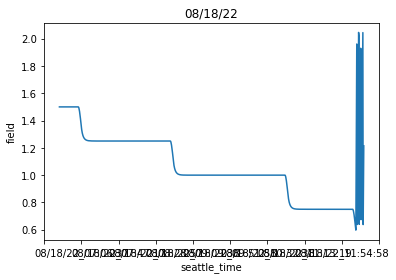

In [17]:
%matplotlib inline
query_nmr_table = '''
                    SELECT *
                    FROM he6cres_runs.nmr 
                    ORDER BY nmr_id DESC 
                    LIMIT 1000
                  '''

nmr_table = db.he6cres_db_query(query_nmr_table).iloc[::-1]
nmr_table["seattle_time"] = nmr_table["created_at"].dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D_%H:%M:%S')
plot = sns.lineplot(data=nmr_table, x="seattle_time", y="field")
date = nmr_table["created_at"].dt.tz_localize('UTC').dt.tz_convert('US/Pacific').dt.strftime('%D')[0]
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plot.set_title("{}".format(date))
plt.show()